### Importacion de librerias necesarias


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import argparse
import pandas as pd

### Cargar los datos recopilados

In [2]:
data_recopilate=pd.read_csv("Datos_recopilados.csv")

### Eliminacion de datos vacios y no consistentes


In [3]:
data_recopilate = data_recopilate.drop(data_recopilate[data_recopilate["Num_Cations"]==0].index)
data_recopilate = data_recopilate.drop(data_recopilate[data_recopilate["Molal_Activity_Coefficient"]==0].index)
data_recopilate.dropna(subset=['Molal_Activity_Coefficient'], inplace=True)
data_recopilate.dropna(subset=['Solvent_Activity'], inplace=True)
data_recopilate.dropna(subset=['Osmotic_Coefficient'], inplace=True)
data_recopilate = data_recopilate.drop(data_recopilate[data_recopilate["Solute_Mol_Mass"]==0].index)
data_recopilate = data_recopilate.drop(data_recopilate[data_recopilate["Solute_Mol_Mass"]==56.11].index)
data_recopilate = data_recopilate.drop(data_recopilate[data_recopilate["Molal_Activity_Coefficient"]>10].index)
data_recopilate = data_recopilate.drop(data_recopilate[data_recopilate["Osmotic_Coefficient"]<0].index)
data_recopilate = data_recopilate.drop_duplicates(['Cation', 'Anion','Molal','Solvent_Mol_Mass' ], keep='first')


### Visualizacion histograma de todas las variables recopiladas

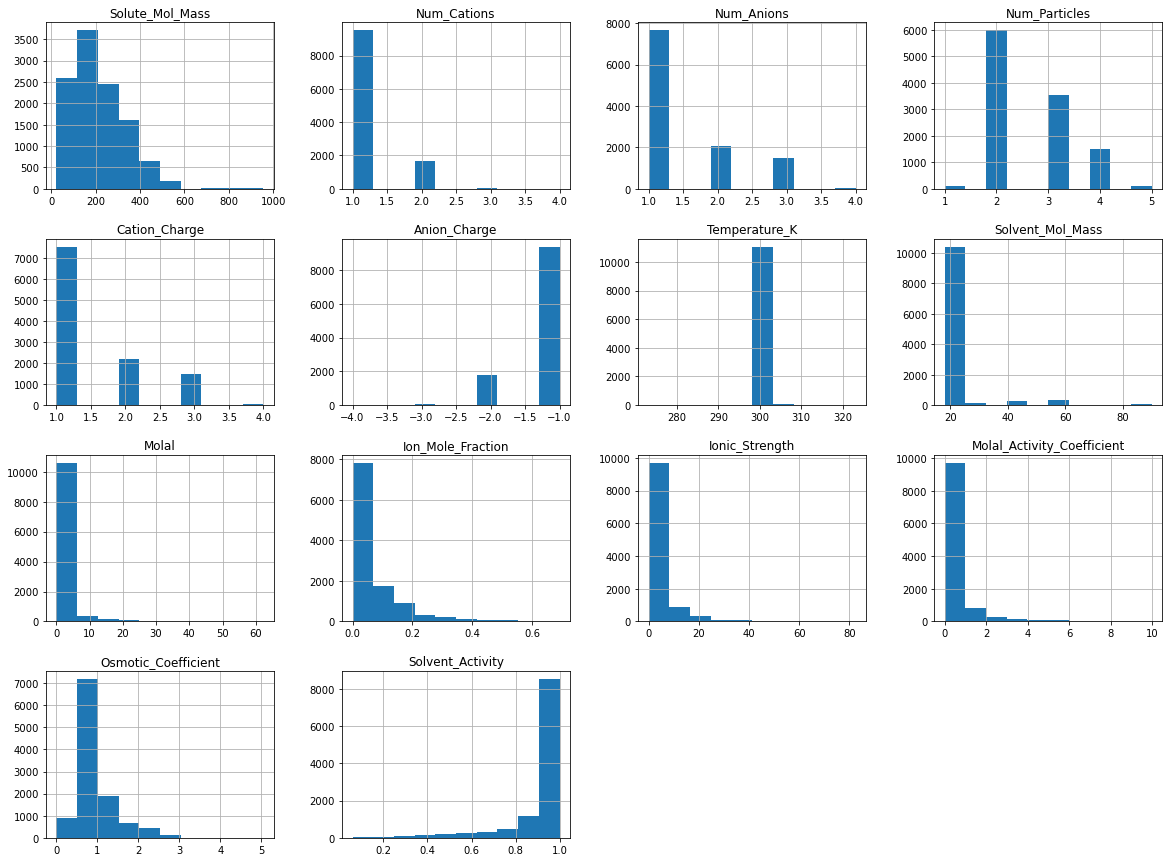

In [4]:
 X_y=data_recopilate.iloc[:, [3,4,5,6,7,8,9,10,11,12,13,14,16,22,23,25,29]]
 X_y.hist(bins=10, figsize=(20,15))
 plt.show()

In [5]:
X_y.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11236 entries, 0 to 15982
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Solute_Mol_Mass             11236 non-null  float64
 1   Num_Cations                 11236 non-null  int64  
 2   Num_Anions                  11236 non-null  int64  
 3   Cation                      11236 non-null  object 
 4   Anion                       11236 non-null  object 
 5   Num_Particles               11236 non-null  int64  
 6   Cation_Charge               11236 non-null  int64  
 7   Anion_Charge                11236 non-null  int64  
 8   Temperature_K               11236 non-null  float64
 9   Solvent_Name                11236 non-null  object 
 10  Solvent_Mol_Mass            11236 non-null  float64
 11  Molal                       11236 non-null  float64
 12  Ion_Mole_Fraction           11236 non-null  float64
 13  Ionic_Strength              112

In [8]:
Data_y.describe()
data_recopilate.reset_index(inplace=True)
data_recopilate=data_recopilate.drop(['index'], axis=1)
data_recopilate.to_csv("Datr.csv")

### Diagrama de cajas y bigotes para datos del coeficiente de actividad

{'whiskers': [<matplotlib.lines.Line2D at 0x7fe93fb68d00>,
 'caps': [<matplotlib.lines.Line2D at 0x7fe93fb692a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fe93fb68a30>],
 'medians': [<matplotlib.lines.Line2D at 0x7fe93fb69840>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fe93fb69b10>],
 'means': []}

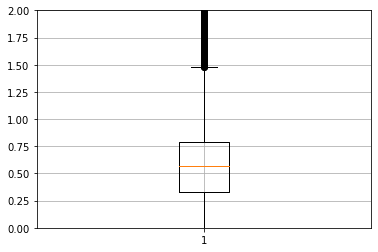

In [9]:
plt.grid(True)
plt.ylim(0, 2)
plt.boxplot(Data_y)


In [10]:
Data_y=Data_y.to_numpy()
(np.min(Data_y), np.quantile(Data_y, 0.25), np.median(Data_y),
np.quantile(Data_y, 0.75), np.max(Data_y))

(0.00265, 0.331675, 0.565, 0.792, 9.97)

In [11]:
x_molar_y=data_recopilate.iloc[:, [14,23]]
x_molar_y=x_molar_y.to_numpy()



### Uso de bosques aleatorios para la identficacion de outliers suponiendo un 5%

In [12]:
from sklearn.ensemble import IsolationForest
resultados = np.zeros((3, x_molar_y.size//2))
c = 0.01

modelo = IsolationForest(contamination=c).fit(x_molar_y)
resultados = modelo.predict(x_molar_y)

    



### Grafico outliers (en azul)

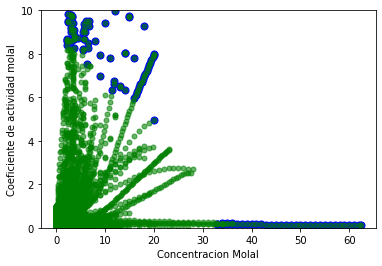

In [13]:

plt.scatter(x_molar_y[resultados==-1][:, 0], 
               x_molar_y[resultados==-1][:, 1], 
               c="blue", marker=".", s=200)
plt.scatter(x_molar_y[:, 0], 
               x_molar_y[:, 1], 
               c="green", marker=".",
               s=100, alpha=0.6)
plt.ylim(0,10)
plt.xlabel("Concentracion Molal")
plt.ylabel("Coeficiente de actividad molal")
plt.show()


In [14]:
resultados=pd.DataFrame(resultados)
resultados = resultados.rename(columns={0:'resultados'})
resultados.reset_index(inplace=True)
x_molar_y=pd.DataFrame(x_molar_y)
data_i_a=pd.concat([data_recopilate,resultados],axis=1)
data_i_a.to_csv("data_i_a.csv")

In [15]:
data_i_a = data_i_a.drop(data_i_a[data_i_a["resultados"]==-1].index)

### Correlacion de pearson (Verificar relacion lineal entre los datos) MAPA DE CALOR

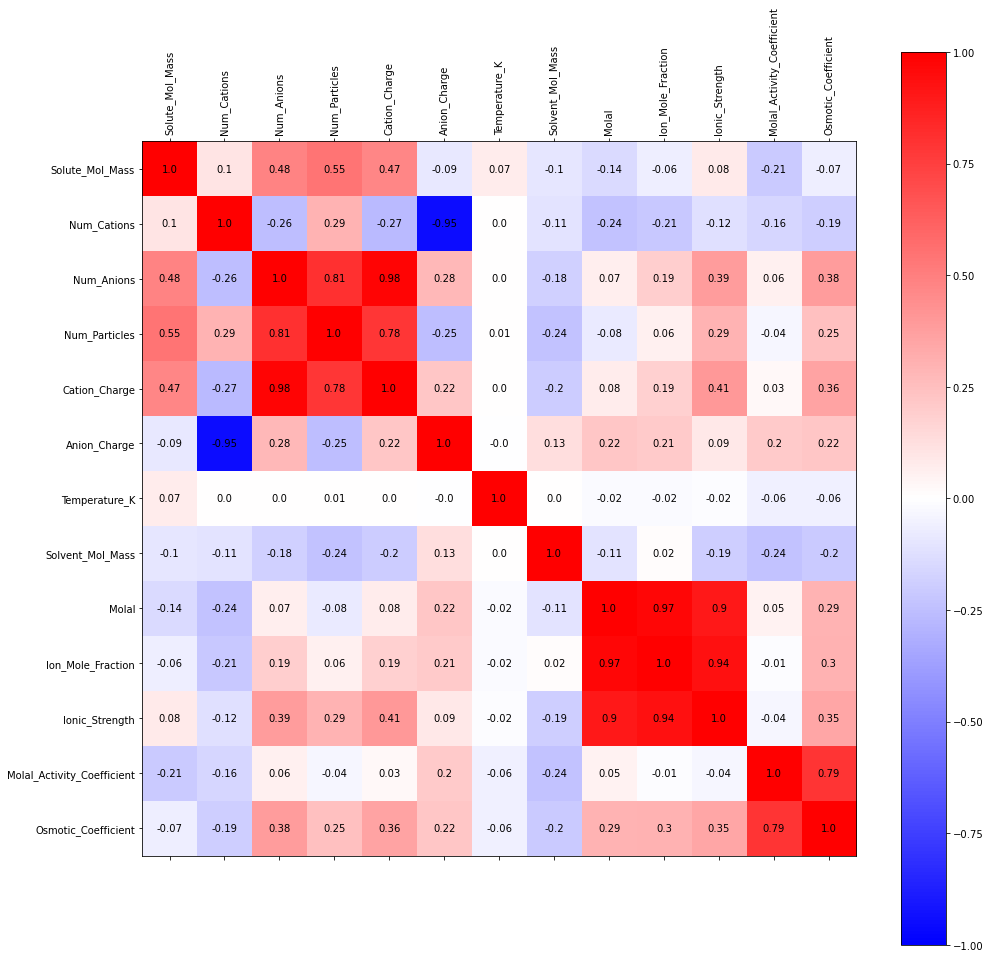

In [19]:
X_y_n=data_i_a.iloc[:, [3,4,5,8,9,10,11,13,14,16,22,23,25]]
matriz = X_y_n.corr('spearman') # -1 (existe una relación fuerte)  0   1 (existe relación fuerte)
plt.rcParams["figure.figsize"] = (10, 20)
fig1=plt.matshow(matriz, cmap="bwr", vmin=-1, vmax=1)
plt.xticks(range(13), X_y_n.columns, rotation=90)
plt.yticks(range(13), X_y_n.columns)

for i in range(len(matriz.columns)):
    for j in range(len(matriz.columns)):
        plt.text(i, j, round(matriz.iloc[i, j], 2),
                 ha="center", va="center")

plt.colorbar()
plt.savefig("Correlaciones Pearson.jpg")
plt.show()


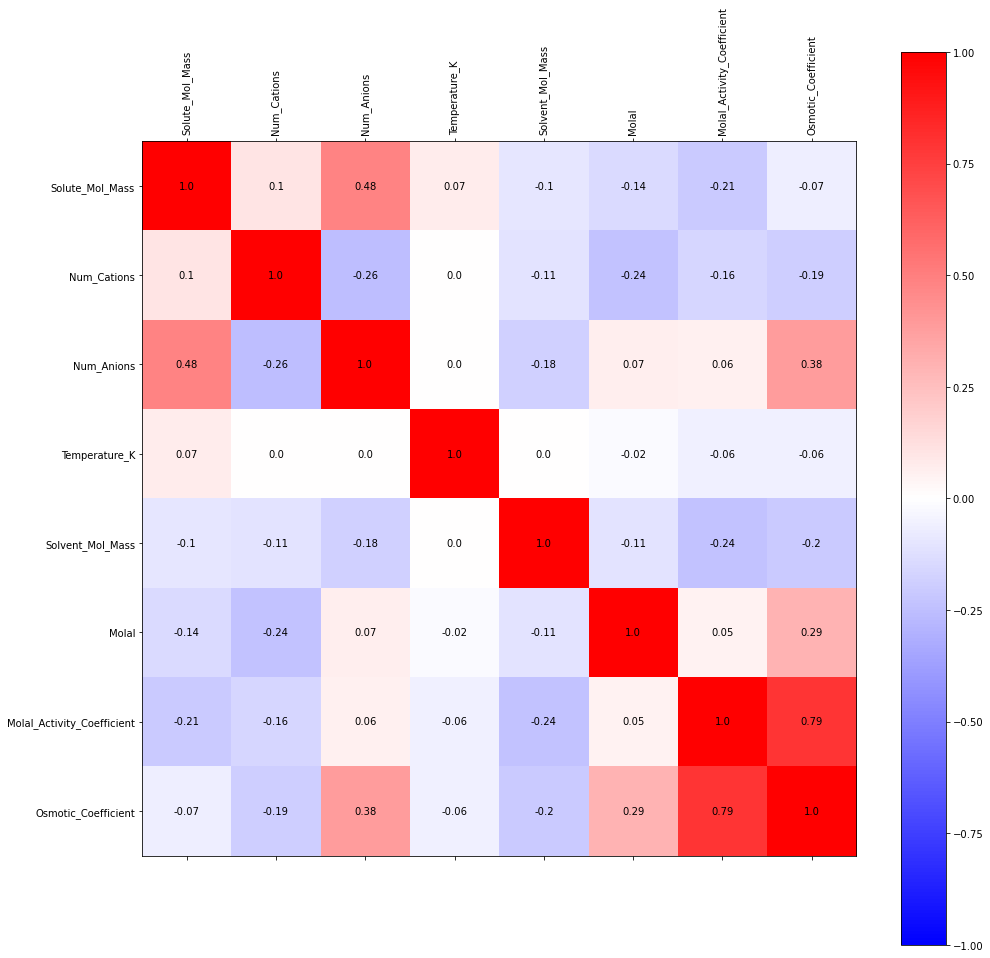

In [22]:
X_y_n=data_i_a.iloc[:, [3,4,5,11,13,14,23,25]]
matriz = X_y_n.corr('spearman') # -1 (existe una relación fuerte)  0   1 (existe relación fuerte)
plt.rcParams["figure.figsize"] = (10, 20)
fig1=plt.matshow(matriz, cmap="bwr", vmin=-1, vmax=1)
plt.xticks(range(8), X_y_n.columns, rotation=90)
plt.yticks(range(8), X_y_n.columns)

for i in range(len(matriz.columns)):
    for j in range(len(matriz.columns)):
        plt.text(i, j, round(matriz.iloc[i, j], 2),
                 ha="center", va="center")

plt.colorbar()
plt.savefig("Correlaciones Pearson.jpg")
plt.show()


In [34]:
data_i_a=data_i_a.iloc[:, [3,4,5,6,7,11,13,14,23,25,29]]
data_i_a.head()

,Solute_Mol_Mass,Num_Cations,Num_Anions,Cation,Anion,Temperature_K,Solvent_Mol_Mass,Molal,Molal_Activity_Coefficient,Osmotic_Coefficient,Solvent_Activity
0,36.46,1,1,H,Cl,298.15,18.01528,0.1,0.796,0.943,0.996608
1,36.46,1,1,H,Cl,298.15,18.01528,0.2,0.767,0.945,0.993213
2,36.46,1,1,H,Cl,298.15,18.01528,0.3,0.756,0.952,0.989763
3,36.46,1,1,H,Cl,298.15,18.01528,0.4,0.755,0.963,0.986217
4,36.46,1,1,H,Cl,298.15,18.01528,0.5,0.757,0.974,0.982606


In [35]:
data_i_a.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11123 entries, 0 to 11235
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Solute_Mol_Mass             11123 non-null  float64
 1   Num_Cations                 11123 non-null  int64  
 2   Num_Anions                  11123 non-null  int64  
 3   Cation                      11123 non-null  object 
 4   Anion                       11123 non-null  object 
 5   Temperature_K               11123 non-null  float64
 6   Solvent_Mol_Mass            11123 non-null  float64
 7   Molal                       11123 non-null  float64
 8   Molal_Activity_Coefficient  11123 non-null  float64
 9   Osmotic_Coefficient         11123 non-null  float64
 10  Solvent_Activity            11123 non-null  float64
dtypes: float64(7), int64(2), object(2)
memory usage: 1.0+ MB


In [36]:
data_i_a.to_csv("Data_clean3.csv")

In [269]:
data_full=pd.read_csv("Datos_recopilate_FULL.csv")
data_full = data_full.drop_duplicates(['Cation', 'Anion','Molal','Solvent_Mol_Mass','Solute_Mol_Mass' ], keep='first')
data_full=data_full.iloc[:, [3,4,5,6,7,11,13,14,23]]
data_full.info()
data_full.to_csv("data_full.csv")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11031 entries, 0 to 12108
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Solute_Mol_Mass             11031 non-null  float64
 1   Num_Cations                 11031 non-null  int64  
 2   Num_Anions                  11031 non-null  int64  
 3   Cation                      11031 non-null  object 
 4   Anion                       11031 non-null  object 
 5   Temperature_K               11031 non-null  float64
 6   Solvent_Mol_Mass            11031 non-null  float64
 7   Molal                       11031 non-null  float64
 8   Molal_Activity_Coefficient  11031 non-null  float64
dtypes: float64(5), int64(2), object(2)
memory usage: 861.8+ KB


### ¡ posterior a esta limpieza y eleccion de variables predictoras, se realizo una limpieza manual, ya que existian diferentes sistemas con informacion repetida.